DATA INFORMATION

Bank Customer Related Data

1 - row number<br>
2 - age (numeric)<br>
3 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 'student', 'technician', 'unemployed', 'unknown')<br> 
4 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br> 
5 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br> 
6 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

Contact Related Information

9 - contact: contact communication type (categorical: 'cellular','telephone')<br> 
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br> 
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br> 
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

Miscellaneous Information

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after client was last contacted  (numeric; 999 = client was not previously contacted)<br> 
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br> 
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
17 - y: has the client subscribed a term deposit? (binary: 'yes','no')

Categorical Variables:

* Marital - (Married , Single , Divorced)
* Job - (Management, BlueCollar, Technician, entrepreneur, retired, admin., services, selfemployed, housemaid, student, unemployed, unknown)
* Contact - (Telephone, Cellular, Unknown)
* Education - (Primary, Secondary, Tertiary, Unknown)
* Month - (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
* Poutcome - (Success, Failure, Other, Unknown)
* Housing - (Yes, No)
* Loan - (Yes, No)
* deposit - (Yes, No)
* Default - (Yes, No)

Numerical Variable:

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous


In [3]:
#Pandas for dataframes
import pandas as pd

#Changing default display option to display all columns
pd.set_option('display.max_columns', 21)

#Numpy for numerical computing
import numpy as np 

#Matplotlib for visualization
import matplotlib.pyplot as plt

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

#Stats package for statistical analysis
from scipy import stats

#Machine learning packages
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
 
df = pd.read_csv('Data/bankfull.csv', sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#Number of observations & variables
df.shape

(45211, 17)

In [5]:
#Data Types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#Additional DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Presence of Null Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#Summary Information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Transformation of categorical variables to numeric based integers are expected to result in additional summary data for analysis. Overall the dataset contains 17 variables (7 numeric and 10 string) with 45,211 observations and no missing values. 

In [9]:
categorical_vars = df.describe(include=["object"]).columns
continuous_vars = df.describe().columns

In [10]:
#The continuous variables represent the numeric data in the dataset
continuous_vars

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
#The categorical variables represent the non-numeric data in the dataset
categorical_vars

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

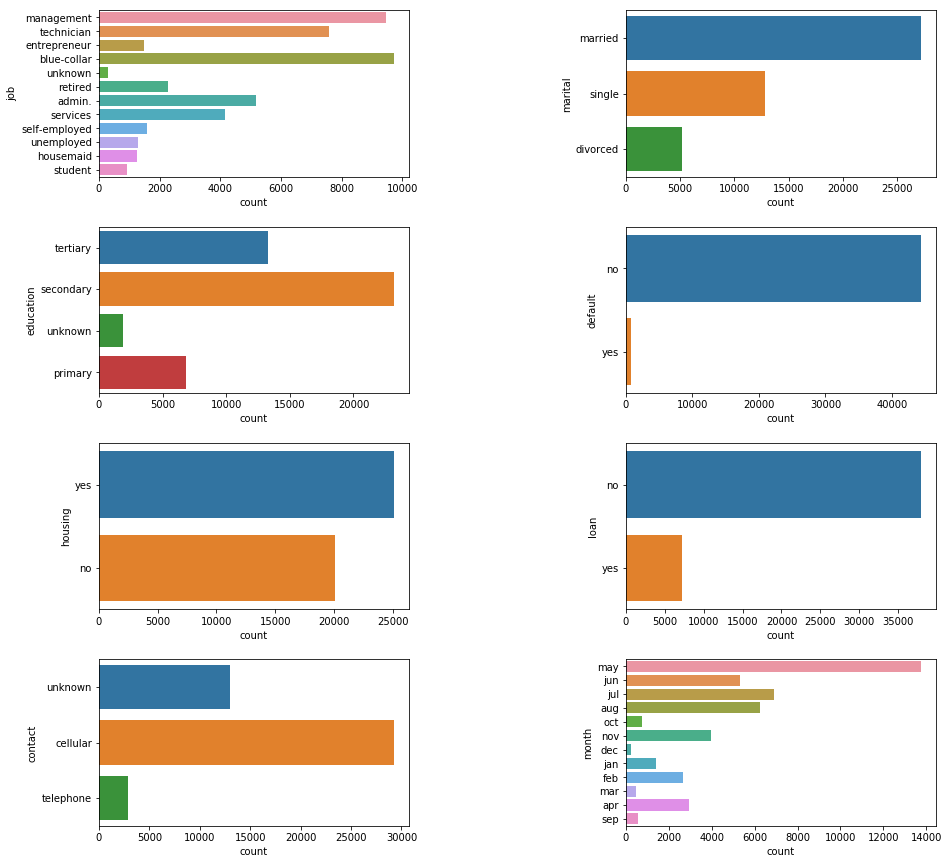

In [12]:
#Plots for count of categorical variables
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)

Based on the results above we can see that the top three results for the "job" variable consist of blue-collar, managment,
and technician. Most subjects are married, followed by single and then divorced. The amount of education is highest at the 
secondary level followed by tertiary (college level) and then primary. Based on the data it is assumed that most subjects 
have no evidence of defaulting on debt, live in a house versus an apartment or other type of dwelling, do not have an 
outstanding balance for a loan, and possess a cell phone as their primary means of contact. The information for the "month"
variable represents the month when the customer was contacted. 

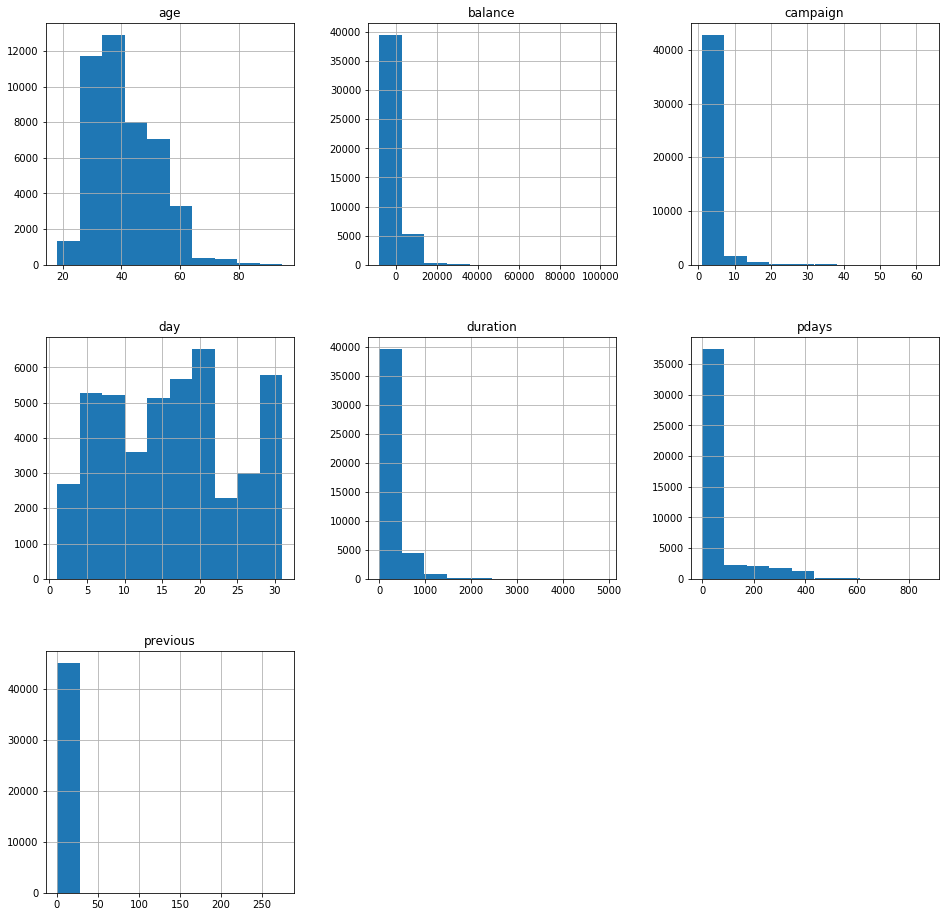

In [13]:
dfhist = df.hist(column=continuous_vars, figsize = (16,16))

For the "age" variable, the highest level of representation is approximately 35 to 41 with very little in an oustanding loan
balance. The highest loan balance appears to be approximately $40,000 with all subjects being part of the study for the 
applicable campaign per the dataset. Most subjects were contacted during the middle of the month and end of the month during
the study. Most contacts are approximately 500 seconds are less with most contacts being contacted again within 100 days. 
The "previous" variable represents the full list of subjects that were made available during a previous campaign prior to the 
study for which the dataset was established.

We'll next evaluate the proportions of the categorical variables

In [14]:
#The propotion of job type variables
df.job.value_counts()/df.job.count()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

Roughly 50% of all types of jobs in the dataset are comprised of the categories "admin", "blue-collar", and "technician". The limited jot types may inhibit the ability to adequately predict the amount of influence for this variable in the analysis. 

In [15]:
#The proportion of the marital status variables
df.marital.value_counts()/df.marital.count()

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

The distribution of this variable is somewhat skewed toward married subjects with single and divorced subjects representing roughly 40%.

In [16]:
#The proportion of the education variable

In [17]:
df.education.value_counts()/df.education.count()

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

More than 70% of the targeted subjects have the equivalent of a university degree or high school diploma. There is a relatively small number of subjects with an unkown education level.

In [19]:
#The proportion of defaults variables
df.default.value_counts()/df.default.count()

no     0.981973
yes    0.018027
Name: default, dtype: float64

There is a very small number of subjects who defaulted on a loan. This variable may not be useful for the analysis.

In [20]:
#The proportion of subjects with a house loan
df.housing.value_counts()/df.housing.count()

yes    0.555838
no     0.444162
Name: housing, dtype: float64

There is almost an even split between the subjects associated with a housing loan product and those subjects who are not.

In [21]:
df.loan.value_counts()/df.loan.count()

no     0.839774
yes    0.160226
Name: loan, dtype: float64

Most of the subjects do not have an ordinary personal loan. There is a relatively small number of subjects with an unknown loan status which may not be useful for the analysis.

In [22]:
df.contact.value_counts()/df.contact.count()

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

More than 64% of all subjects were contacted with the use of a cell phone number.

In [23]:
df.month.value_counts()/df.month.count()

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

Most subjects were contacted during the summer months with more than 30% of all contacts occurring in the month of May. The month of contact may have a substantial impact on timing of a potential investment (tax refunds during tax season, bonuses received at end of year). Skewness of results that reflect contacts during summer months for previous campaign may impact outcome of study for future campaign.

In [25]:
df.day.value_counts()/df.day.count()

20    0.060870
18    0.051050
21    0.044812
17    0.042888
6     0.042733
5     0.042246
14    0.040875
8     0.040742
28    0.040477
7     0.040189
19    0.038862
29    0.038597
15    0.037668
12    0.035456
13    0.035058
30    0.034638
9     0.034527
11    0.032713
4     0.031961
16    0.031298
2     0.028599
27    0.024795
3     0.023866
26    0.022893
23    0.020769
22    0.020017
25    0.018580
31    0.014222
10    0.011590
24    0.009887
1     0.007122
Name: day, dtype: float64

There appears to be no uniformity to the variable for the day of the week for the last contact. No skewness is evident toward a specific day of the week.

In [26]:
df.poutcome.value_counts()/df.poutcome.count()

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

More than 81% of subjects show to be never contacted during the last campaign.

In [27]:
df.y.value_counts()/df.y.count()

no     0.883015
yes    0.116985
Name: y, dtype: float64

Approximately 11% of the subjects invested in the product during the last campaign. 

There appear to be no errors in the numerical data results with some variables not being relevant for further analysis such as "duration" since the duration of the call for the last campaign may not be relevant to the measurement for the same variable in the new analysis. 